<a href="https://colab.research.google.com/github/yal521/DSCI441-machine-learning-project/blob/main/DSCI_441_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
from numpy import where
import pandas as pd
from pandas import Series
import umap
import matplotlib.pyplot as plt
from collections import Counter
import sklearn.metrics as metrique
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.backend import cast
from keras.utils import np_utils
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten


Data Preprocessing

In [ ]:
# Load the data
Credit_data = pd.read_csv("/content/drive/MyDrive/Yang_DSCI441_Final_Project/dataset1_creditcard.csv")

In [ ]:
# Read the first few lines of data
Credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Dividing the data into two parts: observation part and label part
Transaction = Credit_data.drop(['Class'],axis ='columns')
Label = Credit_data ['Class']

In [ ]:
# Feature Extraction:uniform manifold approximation and projection (UMAP)

import pandas as pd
import umap.umap_ as umap

# Initialize the UMAP model
umap_model = umap.UMAP(n_components=3, n_neighbors=15)

# Fit the model to the data
umap_embedding = umap_model.fit_transform(Transaction)

# Identify the informative features
importance_scores = umap_model.embedding_.var(axis=0) # get the variance of each feature in the UMAP embedding
top_features = importance_scores.argsort()[::-1][:10] # select the top 5 features based on their importance scores

# Select the informative features
Transaction_selected = Transaction[:, top_features]

KeyboardInterrupt: ignored

In [ ]:
# Analysis the class label
# In "Class" column, "0" represents fraud transaction and "1" represents non-fraud transaction
counts = Credit_data['Class'].value_counts()
print(counts)
print("The precentage of fraud transaction in all transaction is", f"{492/(284315+492):.5f}%")

0    284315
1       492
Name: Class, dtype: int64
The precentage of fraud transaction in all transaction is 0.00173%


In [ ]:
# Using SMOTE to improve classification performance of the minority fraud instances
oversample = SMOTE()
X_t, Y_l = oversample.fit_resample(Transaction, Label)
# summarize the new class distribution
counter = Counter(Y_l)
print(counter)

Counter({0: 284315, 1: 284315})


TypeError: ignored

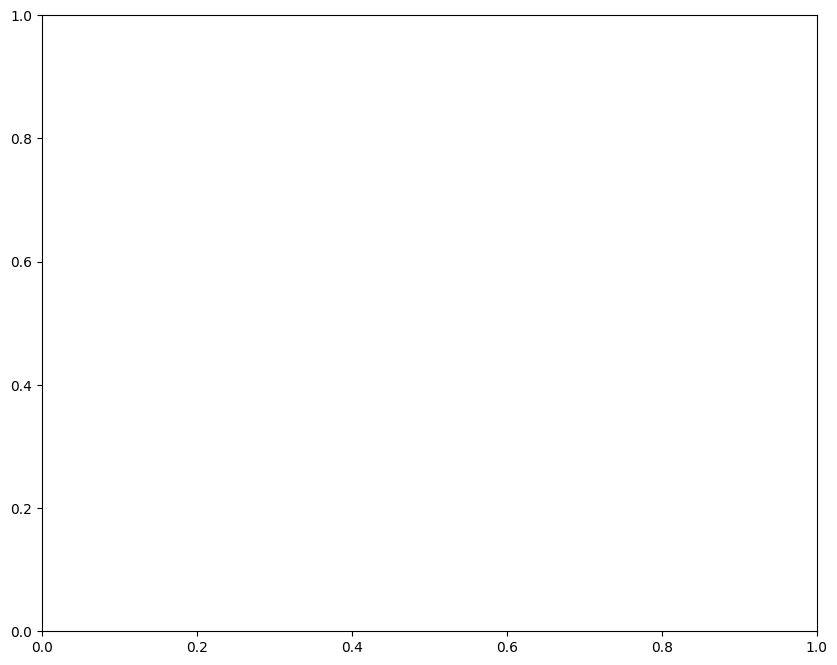

In [ ]:
# Create sample data
category_data = ['0_fraud', '1_non-fraud']
count_data = [284315, 492]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(category_data, count_data)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Categorical Data')
plt.show()


In [ ]:
# Feature Extraction:uniform manifold approximation and projection (UMAP)

In [ ]:
# Model Development

In [ ]:
# Moodel Assessment